<a href="https://colab.research.google.com/github/FranklinPablo/Actividad-1/blob/main/Examen1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen 1
Pablo Jesús Pérez Franklin A01275868

In [419]:
#Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ***Archivo de Microretailer ***

In [ ]:
#Mandamos llamar el archivo
from google.colab import files
files.upload()

In [ ]:
data=pd.read_excel('microretailer_mit_lift_lab.xlsx')
data

Valores numericos

In [ ]:
#Con este filtro seleccioné unicamente los valores numéricos (cuantitativos)
filtro1=data.iloc[ : ,[5,6,13,14,21,22,29,31,33,43,49,51,56,57,58,59,60,78,90]]
filtro1

***Valores Nulos***

In [ ]:
#Mando llamar los valores nulos
valores_nulos=filtro1.isnull().sum()
valores_nulos

In [ ]:
#Realizo una copia y todos los valores nulos los remplazo con el promedio
data1=filtro1.copy()
data1=data1.fillna(round(filtro1.mean(),1))
data1



In [ ]:
#Compruebo nuevamente los valores nulos
valores_nulos=data1.isnull().sum()
valores_nulos

In [ ]:
#Verifico como está esta columna, al parecer todos sus valores son nulos, por lo 
#que mejor la elimino
filtro0=data1.loc[:,["273_platform_extra_charge"]]
filtro0

In [ ]:
#Elimino la columna sin valores 
data2=data1.drop(['273_platform_extra_charge'], axis=1)
data2

In [ ]:
#Verifico mis valores nulos
valores_nulos=data2.isnull().sum()
valores_nulos

In [430]:
#Estamos bien ya que la suma del total da de 0 valores nulos
valores_nulos=data2.isnull().sum().sum()
valores_nulos

0

***Valores atípicos***

<Figure size 360x504 with 0 Axes>

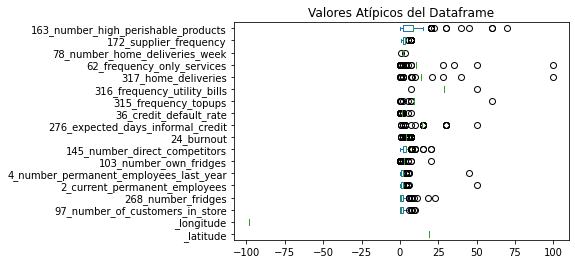

In [431]:
#Dibujo el diagrama de caja y bigotes para verificar los valores atípicos de mi 
# dataframe
fig=plt.figure(figsize=(5,7))
data2.plot(kind='box',vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

In [432]:
# realizo el método de outliers vistos en clase, este es el primer meto
y=data2
limite_superior= y.mean() + 3*y.std()
limite_inferior= y.mean() - 3*y.std()
print("Límite superior permitido",limite_superior)
print("Límite inferior permitido",limite_inferior)

Límite superior permitido _latitude                                 19.111172
_longitude                               -98.090304
97_number_of_customers_in_store            6.591777
268_number_fridges                        10.155335
2_current_permanent_employees             13.659862
4_number_permanent_employees_last_year    12.386900
103_number_own_fridges                     7.244937
145_number_direct_competitors             12.374221
24_burnout                                 7.263834
276_expected_days_informal_credit         28.617998
36_credit_default_rate                     3.313585
315_frequency_topups                      21.535127
316_frequency_utility_bills               35.496007
317_home_deliveries                       36.568770
62_frequency_only_services                35.753739
78_number_home_deliveries_week             2.325396
172_supplier_frequency                     7.578440
163_number_high_perishable_products       38.631082
dtype: float64
Límite inferior permiti

In [433]:
outliers=data2[(y>limite_superior)|(y<limite_inferior)]
outliers

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [434]:
#Insiders
data3=data2[(y<=limite_superior)&(y>=limite_inferior)]
data3

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
0,19.053536,-98.233822,2.0,0.0,2.0,2.0,2.5,3.0,4.2,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,0.0
1,19.053561,-98.234142,0.0,4.0,1.0,1.0,2.5,4.0,4.2,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,NaN
2,19.058655,-98.232300,0.0,0.0,2.0,2.0,2.5,0.0,4.2,10.0,1.6,9.0,28.5,13.6,10.5,2.0,3.0,NaN
3,19.059293,-98.233158,0.0,0.0,1.0,1.0,2.5,4.0,4.2,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,0.0
4,19.059585,-98.233864,0.0,0.0,0.0,0.0,2.5,0.0,4.2,15.0,1.6,9.0,28.5,13.6,10.5,2.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,1.0,0.0,2.1,1.9,2.5,3.8,4.2,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6
167,19.042794,-98.193802,1.0,5.0,2.1,1.9,2.5,3.8,4.2,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6
168,19.042809,-98.193439,3.0,1.0,2.1,1.9,2.5,3.8,4.2,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6
169,19.042558,-98.193818,0.0,1.0,2.1,1.9,2.5,3.8,4.2,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6


In [435]:
#Verifico nuevamente que no tenga ningún valor nulo
valores_nulos=data3.isnull().sum()
valores_nulos

_latitude                                 0
_longitude                                0
97_number_of_customers_in_store           4
268_number_fridges                        3
2_current_permanent_employees             1
4_number_permanent_employees_last_year    1
103_number_own_fridges                    1
145_number_direct_competitors             4
24_burnout                                4
276_expected_days_informal_credit         6
36_credit_default_rate                    2
315_frequency_topups                      1
316_frequency_utility_bills               2
317_home_deliveries                       2
62_frequency_only_services                2
78_number_home_deliveries_week            2
172_supplier_frequency                    0
163_number_high_perishable_products       5
dtype: int64

In [436]:
#Reemplazo los valores nulos por el método de promedio
data_clean_1=data3.copy()
data_clean_1=data_clean_1.fillna(round(data3.mean(),1))
data_clean_1

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
0,19.053536,-98.233822,2.0,0.0,2.0,2.0,2.5,3.0,4.2,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,0.0
1,19.053561,-98.234142,0.0,4.0,1.0,1.0,2.5,4.0,4.2,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,7.2
2,19.058655,-98.232300,0.0,0.0,2.0,2.0,2.5,0.0,4.2,10.0,1.6,9.0,28.5,13.6,10.5,2.0,3.0,7.2
3,19.059293,-98.233158,0.0,0.0,1.0,1.0,2.5,4.0,4.2,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,0.0
4,19.059585,-98.233864,0.0,0.0,0.0,0.0,2.5,0.0,4.2,15.0,1.6,9.0,28.5,13.6,10.5,2.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,1.0,0.0,2.1,1.9,2.5,3.8,4.2,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6
167,19.042794,-98.193802,1.0,5.0,2.1,1.9,2.5,3.8,4.2,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6
168,19.042809,-98.193439,3.0,1.0,2.1,1.9,2.5,3.8,4.2,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6
169,19.042558,-98.193818,0.0,1.0,2.1,1.9,2.5,3.8,4.2,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6


In [437]:
#Verifico nulos
valores_nulos=data_clean_1.isnull().sum()
valores_nulos

_latitude                                 0
_longitude                                0
97_number_of_customers_in_store           0
268_number_fridges                        0
2_current_permanent_employees             0
4_number_permanent_employees_last_year    0
103_number_own_fridges                    0
145_number_direct_competitors             0
24_burnout                                0
276_expected_days_informal_credit         0
36_credit_default_rate                    0
315_frequency_topups                      0
316_frequency_utility_bills               0
317_home_deliveries                       0
62_frequency_only_services                0
78_number_home_deliveries_week            0
172_supplier_frequency                    0
163_number_high_perishable_products       0
dtype: int64

***Valores cualitativos***

In [438]:
#Con este filtro seleccioné unicamente los valores objeto (cualitativos)
filtro2=data.iloc[ : ,[0,1,2,3,4,9,10,11,12,18,19,20,23,24,25,26,27,28,30,32,34,35,36,37,38,39,40,41,47,48,50,52,53,54,55,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,79,80,81,82,83,84,85,86,87,88,89,91,92,93,94,95,96]]
filtro2

,_record_id,_title,_server_updated_at,_updated_by,_geometry,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,...,157_frequency_organize_shelves,158_charact_organize_products_on_shelves,161_actions_stockouts,162_inventory_extra_space,249_technology_training,250_technology_investment_operations,251_technology_investment_customers,254_technology_roadmap,260_technology_scalable,261_technology_organization
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),Tailor,yes,no,no,yes,...,Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes...",Solicitar tiempo al cliente para conseguir el ...,0,NaN,NaN,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),Grocery store (aka. nanostore),no,yes,yes,yes,...,NaN,"Categoría (e.g. limpieza, aseo personal, comes...","Ofrecer un producto sustituto,Solicitar tiempo...",10%,NaN,NaN,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),Grocery store (aka. nanostore),yes,no,no,yes,...,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",Perder la venta,10%,NaN,NaN,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),Grocery store (aka. nanostore),no,no,no,yes,...,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",Ofrecer un producto sustituto,0,NaN,NaN,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),Grocery store (aka. nanostore),yes,no,no,yes,...,Mensualmente,Venta cruzada (e.g. cereal + leche),"Informar al proveedor,Solicitar tiempo al clie...",0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2413f06e-15cc-4a6f-8e83-5224c6824b12,"November 3, 2022",2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),Grocery store (aka. nanostore),yes,no,no,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,962bf5a6-1eff-4874-a627-9cd8e3ca27b4,"November 3, 2022",2022-11-03 16:28:15 UTC,Emilio Garza,SRID=4326;POINT(-98.1938023854 19.0427938182),Grocery store (aka. nanostore),no,no,no,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,"November 3, 2022",2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),Micro-restaurant (aka. fondita),yes,no,yes,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,"November 3, 2022",2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),Micro-restaurant (aka. fondita),no,no,yes,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***valores nulos***

In [439]:
#Mando llamar los valores nulos
valores_nulos=filtro2.isnull().sum()
valores_nulos

_record_id                                0
_title                                    0
_server_updated_at                        0
_updated_by                               0
_geometry                                 0
                                       ... 
250_technology_investment_operations     97
251_technology_investment_customers      98
254_technology_roadmap                  100
260_technology_scalable                 102
261_technology_organization             102
Length: 69, dtype: int64

In [440]:
#Reemplazo los valores nulos con el método de bfill
data4=filtro2.fillna(method="bfill")
data4

,_record_id,_title,_server_updated_at,_updated_by,_geometry,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,...,157_frequency_organize_shelves,158_charact_organize_products_on_shelves,161_actions_stockouts,162_inventory_extra_space,249_technology_training,250_technology_investment_operations,251_technology_investment_customers,254_technology_roadmap,260_technology_scalable,261_technology_organization
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),Tailor,yes,no,no,yes,...,Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes...",Solicitar tiempo al cliente para conseguir el ...,0,De acuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,Totalmente en desacuerdo,En desacuerdo,De acuerdo
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),Grocery store (aka. nanostore),no,yes,yes,yes,...,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...","Ofrecer un producto sustituto,Solicitar tiempo...",10%,De acuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,Totalmente en desacuerdo,En desacuerdo,De acuerdo
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),Grocery store (aka. nanostore),yes,no,no,yes,...,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",Perder la venta,10%,De acuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,Totalmente en desacuerdo,En desacuerdo,De acuerdo
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),Grocery store (aka. nanostore),no,no,no,yes,...,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",Ofrecer un producto sustituto,0,De acuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,Totalmente en desacuerdo,En desacuerdo,De acuerdo
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),Grocery store (aka. nanostore),yes,no,no,yes,...,Mensualmente,Venta cruzada (e.g. cereal + leche),"Informar al proveedor,Solicitar tiempo al clie...",0,De acuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,Totalmente en desacuerdo,En desacuerdo,De acuerdo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2413f06e-15cc-4a6f-8e83-5224c6824b12,"November 3, 2022",2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),Grocery store (aka. nanostore),yes,no,no,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,962bf5a6-1eff-4874-a627-9cd8e3ca27b4,"November 3, 2022",2022-11-03 16:28:15 UTC,Emilio Garza,SRID=4326;POINT(-98.1938023854 19.0427938182),Grocery store (aka. nanostore),no,no,no,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,"November 3, 2022",2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),Micro-restaurant (aka. fondita),yes,no,yes,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,"November 3, 2022",2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),Micro-restaurant (aka. fondita),no,no,yes,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [441]:
#Como aún tenía valores nulos, nuevamente los reemplazo con el método de ffill
data5=data4.copy()
data5=data5.fillna(method="ffill")
data5


,_record_id,_title,_server_updated_at,_updated_by,_geometry,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,...,157_frequency_organize_shelves,158_charact_organize_products_on_shelves,161_actions_stockouts,162_inventory_extra_space,249_technology_training,250_technology_investment_operations,251_technology_investment_customers,254_technology_roadmap,260_technology_scalable,261_technology_organization
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),Tailor,yes,no,no,yes,...,Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes...",Solicitar tiempo al cliente para conseguir el ...,0,De acuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,Totalmente en desacuerdo,En desacuerdo,De acuerdo
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),Grocery store (aka. nanostore),no,yes,yes,yes,...,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...","Ofrecer un producto sustituto,Solicitar tiempo...",10%,De acuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,Totalmente en desacuerdo,En desacuerdo,De acuerdo
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),Grocery store (aka. nanostore),yes,no,no,yes,...,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",Perder la venta,10%,De acuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,Totalmente en desacuerdo,En desacuerdo,De acuerdo
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),Grocery store (aka. nanostore),no,no,no,yes,...,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",Ofrecer un producto sustituto,0,De acuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,Totalmente en desacuerdo,En desacuerdo,De acuerdo
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),Grocery store (aka. nanostore),yes,no,no,yes,...,Mensualmente,Venta cruzada (e.g. cereal + leche),"Informar al proveedor,Solicitar tiempo al clie...",0,De acuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,Totalmente en desacuerdo,En desacuerdo,De acuerdo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2413f06e-15cc-4a6f-8e83-5224c6824b12,"November 3, 2022",2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),Grocery store (aka. nanostore),yes,no,no,no,...,Mensualmente,Tamaño,"Informar al proveedor,Ofrecer un producto sust...",20%,De acuerdo,En desacuerdo,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,Totalmente en desacuerdo
167,962bf5a6-1eff-4874-a627-9cd8e3ca27b4,"November 3, 2022",2022-11-03 16:28:15 UTC,Emilio Garza,SRID=4326;POINT(-98.1938023854 19.0427938182),Grocery store (aka. nanostore),no,no,no,no,...,Mensualmente,Tamaño,"Informar al proveedor,Ofrecer un producto sust...",20%,De acuerdo,En desacuerdo,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,Totalmente en desacuerdo
168,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,"November 3, 2022",2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),Micro-restaurant (aka. fondita),yes,no,yes,no,...,Mensualmente,Tamaño,"Informar al proveedor,Ofrecer un producto sust...",20%,De acuerdo,En desacuerdo,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,Totalmente en desacuerdo
169,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,"November 3, 2022",2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),Micro-restaurant (aka. fondita),no,no,yes,no,...,Mensua

In [442]:
#Elimino columnos que considero que son innecesarias
data6=data5.drop(['_record_id','_title','_server_updated_at','271_card_fee'], axis=1)
data6

,_updated_by,_geometry,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,le_comento_que_toda_esta_informacin_es_confidencial,233_date_establishment,5_change_store_space_last_year,...,157_frequency_organize_shelves,158_charact_organize_products_on_shelves,161_actions_stockouts,162_inventory_extra_space,249_technology_training,250_technology_investment_operations,251_technology_investment_customers,254_technology_roadmap,260_technology_scalable,261_technology_organization
0,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),Tailor,yes,no,no,yes,yes,2021-04-12,No cambió,...,Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes...",Solicitar tiempo al cliente para conseguir el ...,0,De acuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,Totalmente en desacuerdo,En desacuerdo,De acuerdo
1,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),Grocery store (aka. nanostore),no,yes,yes,yes,yes,2012-08-12,Aumentó 15%,...,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...","Ofrecer un producto sustituto,Solicitar tiempo...",10%,De acuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,Totalmente en desacuerdo,En desacuerdo,De acuerdo
2,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),Grocery store (aka. nanostore),yes,no,no,yes,yes,2022-08-12,No cambió,...,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",Perder la venta,10%,De acuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,Totalmente en desacuerdo,En desacuerdo,De acuerdo
3,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),Grocery store (aka. nanostore),no,no,no,yes,yes,2008-11-12,No cambió,...,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",Ofrecer un producto sustituto,0,De acuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,Totalmente en desacuerdo,En desacuerdo,De acuerdo
4,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),Grocery store (aka. nanostore),yes,no,no,yes,yes,2007-10-12,No cambió,...,Mensualmente,Venta cruzada (e.g. cereal + leche),"Informar al proveedor,Solicitar tiempo al clie...",0,De acuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,Totalmente en desacuerdo,En desacuerdo,De acuerdo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),Grocery store (aka. nanostore),yes,no,no,no,yes,2022-11-03,Aumentó 25%,...,Mensualmente,Tamaño,"Informar al proveedor,Ofrecer un producto sust...",20%,De acuerdo,En desacuerdo,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,Totalmente en desacuerdo
167,Emilio Garza,SRID=4326;POINT(-98.1938023854 19.0427938182),Grocery store (aka. nanostore),no,no,no,no,yes,2022-11-03,Aumentó 25%,...,Mensualmente,Tamaño,"Informar al proveedor,Ofrecer un producto sust...",20%,De acuerdo,En desacuerdo,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,Totalmente en desacuerdo
168,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),Micro-restaurant (aka. fondita),yes,no,yes,no,yes,2022-11-03,Aumentó 25%,...,Mensualmente,Tamaño,"Informar al proveedor,Ofrecer un producto sust...",20%,De acuerdo,En desacuerdo,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,Totalmente en desacuerdo
169,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),Micro-restaurant (aka. fondita),no,no,yes,no,yes,2022-11-03,Aumentó 25%,...,Mensualmente,Tamaño,"Informar al proveedor,Ofrecer un producto sust...",20%,De acuerdo,En desacuerdo,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,Totalmente en desacuerdo


In [443]:
#Verifico la suma de los nulos
valores_nulos=data6.isnull().sum().sum()
valores_nulos

0

In [444]:
valores_nulos=data6.isnull().sum()
valores_nulos

_updated_by                                              0
_geometry                                                0
232_type_of_store                                        0
108_does_the_micro_retailer_has_a_barred_window_         0
99_does_the_micro_retailer_exhibits_products_outside_    0
                                                        ..
250_technology_investment_operations                     0
251_technology_investment_customers                      0
254_technology_roadmap                                   0
260_technology_scalable                                  0
261_technology_organization                              0
Length: 65, dtype: int64

In [445]:
#Al completar todo lo anterior, junto mis tablas de valores cualitativos con los
# cuantitativos
Datos_limpios_microretailer=pd.concat([data_clean_1, data6], axis=1)
Datos_limpios_microretailer

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,276_expected_days_informal_credit,...,157_frequency_organize_shelves,158_charact_organize_products_on_shelves,161_actions_stockouts,162_inventory_extra_space,249_technology_training,250_technology_investment_operations,251_technology_investment_customers,254_technology_roadmap,260_technology_scalable,261_technology_organization
0,19.053536,-98.233822,2.0,0.0,2.0,2.0,2.5,3.0,4.2,14.2,...,Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes...",Solicitar tiempo al cliente para conseguir el ...,0,De acuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,Totalmente en desacuerdo,En desacuerdo,De acuerdo
1,19.053561,-98.234142,0.0,4.0,1.0,1.0,2.5,4.0,4.2,14.2,...,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...","Ofrecer un producto sustituto,Solicitar tiempo...",10%,De acuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,Totalmente en desacuerdo,En desacuerdo,De acuerdo
2,19.058655,-98.232300,0.0,0.0,2.0,2.0,2.5,0.0,4.2,10.0,...,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",Perder la venta,10%,De acuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,Totalmente en desacuerdo,En desacuerdo,De acuerdo
3,19.059293,-98.233158,0.0,0.0,1.0,1.0,2.5,4.0,4.2,14.2,...,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",Ofrecer un producto sustituto,0,De acuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,Totalmente en desacuerdo,En desacuerdo,De acuerdo
4,19.059585,-98.233864,0.0,0.0,0.0,0.0,2.5,0.0,4.2,15.0,...,Mensualmente,Venta cruzada (e.g. cereal + leche),"Informar al proveedor,Solicitar tiempo al clie...",0,De acuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,Totalmente en desacuerdo,En desacuerdo,De acuerdo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,1.0,0.0,2.1,1.9,2.5,3.8,4.2,14.2,...,Mensualmente,Tamaño,"Informar al proveedor,Ofrecer un producto sust...",20%,De acuerdo,En desacuerdo,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,Totalmente en desacuerdo
167,19.042794,-98.193802,1.0,5.0,2.1,1.9,2.5,3.8,4.2,14.2,...,Mensualmente,Tamaño,"Informar al proveedor,Ofrecer un producto sust...",20%,De acuerdo,En desacuerdo,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,Totalmente en desacuerdo
168,19.042809,-98.193439,3.0,1.0,2.1,1.9,2.5,3.8,4.2,14.2,...,Mensualmente,Tamaño,"Informar al proveedor,Ofrecer un producto sust...",20%,De acuerdo,En desacuerdo,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,Totalmente en desacuerdo
169,19.042558,-98.193818,0.0,1.0,2.1,1.9,2.5,3.8,4.2,14.2,...,Mensualmente,Tamaño,"Informar al proveedor,Ofrecer un producto sust...",20%,De acuerdo,En desacuerdo,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,Totalmente en desacuerdo


In [487]:
#Exporto mis datos limpios a un archivo de excel
Datos_limpios_microretailer.to_csv("Datos_limpios_microretailer.csv")
from google.colab import files
files.download("Datos_limpios_microretailer.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ***Archivo de Consumer ***

In [ ]:
#Mandamos llamar el archivo
from google.colab import files
files.upload()

In [ ]:
data_c=pd.read_excel('consumer_mit_lift_lab.xlsx')
data_c

In [ ]:
data_c.info()

***Valores cuantitativos ***

***nulos***

In [ ]:
#Con este filtro seleccioné unicamente los valores numéricos (cuantitativos)
filtro_c=data_c.iloc[ : ,[5,6,12,26,27,28,29,30,31]]
filtro_c

In [451]:
#Mando llamar los valores nulos y al observar que no hay ningún nulo
#procedo a realizar los valores atípicos
valores_nulos_c=filtro_c.isnull().sum()
valores_nulos_c

_latitude                              0
_longitude                             0
238_frequency_buying_store             0
81_number_online_purchases_month       0
288_number_app_purchases_month         0
289_number_whatsapp_purchases_month    0
83_willingness_ultrafast_delivery      0
84_willingness_sameday_delivery        0
241_age_of_the_interviewee             0
dtype: int64

***Valores atípicos***

<Figure size 720x360 with 0 Axes>

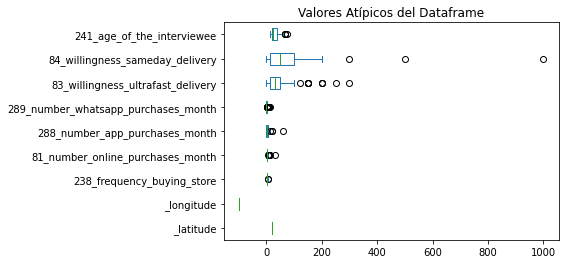

In [452]:
#Dibujo el diagrama de caja y bigotes para verificar los valores atípicos de mi 
# dataframe
fig=plt.figure(figsize=(10,5))
filtro_c.plot(kind='box',vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [453]:
#realizo el método de outliers vistos en clase, este es el segundo metodo
#percetniles
y=filtro_c

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75-percentile25

limite_superior_iqr= percentile75 + 1.5*iqr
limite_inferior_iqr= percentile25 - 1.5*iqr
print("límite superior permitido",limite_superior_iqr)
print("límite inferior permitido",limite_inferior_iqr)

límite superior permitido _latitude                               19.137956
_longitude                             -98.025979
238_frequency_buying_store               6.000000
81_number_online_purchases_month         6.000000
288_number_app_purchases_month          12.500000
289_number_whatsapp_purchases_month      2.500000
83_willingness_ultrafast_delivery      102.500000
84_willingness_sameday_delivery        231.250000
241_age_of_the_interviewee              65.000000
dtype: float64
límite inferior permitido _latitude                               18.959124
_longitude                             -98.402770
238_frequency_buying_store              -2.000000
81_number_online_purchases_month        -2.000000
288_number_app_purchases_month          -7.500000
289_number_whatsapp_purchases_month     -1.500000
83_willingness_ultrafast_delivery      -37.500000
84_willingness_sameday_delivery       -118.750000
241_age_of_the_interviewee              -7.000000
dtype: float64


In [454]:
outliers_iqr= filtro_c[(y>limite_superior_iqr)|(y<limite_inferior_iqr)]
outliers_iqr

,_latitude,_longitude,238_frequency_buying_store,81_number_online_purchases_month,288_number_app_purchases_month,289_number_whatsapp_purchases_month,83_willingness_ultrafast_delivery,84_willingness_sameday_delivery,241_age_of_the_interviewee
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
110,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN
111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [455]:
insiders_iqr=filtro_c[(y<=limite_superior_iqr)&(y>=limite_inferior_iqr)]
insiders_iqr

,_latitude,_longitude,238_frequency_buying_store,81_number_online_purchases_month,288_number_app_purchases_month,289_number_whatsapp_purchases_month,83_willingness_ultrafast_delivery,84_willingness_sameday_delivery,241_age_of_the_interviewee
0,19.059841,-98.234980,1.0,1.0,0.0,0.0,0.0,0.0,35.0
1,19.058479,-98.233566,1.0,1.0,2.0,0.0,35.0,50.0,27.0
2,19.062077,-98.230339,1.0,0.0,0.0,0.0,40.0,25.0,42.0
3,19.055535,-98.232916,1.0,2.0,3.0,0.0,0.0,0.0,27.0
4,19.059012,-98.232994,1.0,2.0,5.0,0.0,0.0,50.0,35.0
...,...,...,...,...,...,...,...,...,...
110,19.035224,-98.267100,1.0,NaN,10.0,0.0,100.0,100.0,15.0
111,19.035280,-98.267856,1.0,1.0,1.0,0.0,50.0,70.0,21.0
112,19.035451,-98.267862,1.0,3.0,2.0,0.0,0.0,0.0,18.0
113,19.035486,-98.267831,1.0,2.0,4.0,0.0,30.0,100.0,18.0


In [456]:
#Mando llamar los valores nulos para verificar
valores_nulos_c=insiders_iqr.isnull().sum()
valores_nulos_c

_latitude                               0
_longitude                              0
238_frequency_buying_store              2
81_number_online_purchases_month        9
288_number_app_purchases_month          4
289_number_whatsapp_purchases_month    19
83_willingness_ultrafast_delivery      10
84_willingness_sameday_delivery         3
241_age_of_the_interviewee              4
dtype: int64

In [457]:
#Reemplazo nuevamente los valores nulos
data_clean_c=insiders_iqr.copy()
data_clean_c=data_clean_c.fillna(round(insiders_iqr.median(),1))
data_clean_c

,_latitude,_longitude,238_frequency_buying_store,81_number_online_purchases_month,288_number_app_purchases_month,289_number_whatsapp_purchases_month,83_willingness_ultrafast_delivery,84_willingness_sameday_delivery,241_age_of_the_interviewee
0,19.059841,-98.234980,1.0,1.0,0.0,0.0,0.0,0.0,35.0
1,19.058479,-98.233566,1.0,1.0,2.0,0.0,35.0,50.0,27.0
2,19.062077,-98.230339,1.0,0.0,0.0,0.0,40.0,25.0,42.0
3,19.055535,-98.232916,1.0,2.0,3.0,0.0,0.0,0.0,27.0
4,19.059012,-98.232994,1.0,2.0,5.0,0.0,0.0,50.0,35.0
...,...,...,...,...,...,...,...,...,...
110,19.035224,-98.267100,1.0,2.0,10.0,0.0,100.0,100.0,15.0
111,19.035280,-98.267856,1.0,1.0,1.0,0.0,50.0,70.0,21.0
112,19.035451,-98.267862,1.0,3.0,2.0,0.0,0.0,0.0,18.0
113,19.035486,-98.267831,1.0,2.0,4.0,0.0,30.0,100.0,18.0


In [458]:
#Mando llamar los valores nulos para verificar
valores_nulos_c=data_clean_c.isnull().sum()
valores_nulos_c

_latitude                              0
_longitude                             0
238_frequency_buying_store             0
81_number_online_purchases_month       0
288_number_app_purchases_month         0
289_number_whatsapp_purchases_month    0
83_willingness_ultrafast_delivery      0
84_willingness_sameday_delivery        0
241_age_of_the_interviewee             0
dtype: int64

***Valores cualitativos***

***Nulos***

In [459]:
#Con este filtro seleccioné unicamente los valores objeto (cualitativos)
filtro_c2=data_c.iloc[ : ,[0,1,2,3,4,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,32,33,34]]
filtro_c2

,_record_id,_title,_server_updated_at,_updated_by,_geometry,282_payment_method_that_purchase,283_fulfill_needs,300_did_not_find,237_distance_household_interviewee,299_means_transportation_consumer,...,307_gas_bill_store,286_topups,308_topups_in_store,287_wire_transfers,309_wiretransfers_in_store,320_other_services_in_store,304_additional_services_store,240_gender_interviewee,indicate_the_type_of_store,name_of_the_store
0,060a856c-e3b8-41a7-b680-9756172d1c29,"November 12, 2022",2022-11-12 22:43:08 UTC,Ulises Núñez Bautista,SRID=4326;POINT(-98.2349802856 19.0598413203),Efectivo,no,agua de coco,0 a 3 cuadras,A pie,...,no,No lo hago,no,Banco,no,no,NaN,Male,Cafeteria,Paleteria El Carmen
1,c42fdf22-b93b-443e-8f46-6043613cb0c3,"November 12, 2022",2022-11-12 22:15:02 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2335660729 19.05847939),Efectivo,yes,NaN,7 a 10 cuadras,A pie,...,no,Tienda de conveniencia (e.g. OXXO),no,Banco,no,no,NaN,Female,Grocery store (aka. nanostore),Gerardo Saénz
2,3ccaedc0-949e-4555-afad-b2e1d77c3219,"November 12, 2022",2022-11-12 22:15:02 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2303385023 19.0620767997),Efectivo,yes,NaN,más de 10 cuadras,Automóvil,...,yes,"Supermercado,Tienda de conveniencia (e.g. OXXO)",yes,Banco,no,no,NaN,Female,Micro-restaurant (aka. fondita),Rozt
3,91d8a240-af2c-451b-900f-3480f82e05db,"November 12, 2022",2022-11-12 20:41:38 UTC,Jorge Alberto Ostorga Flores,SRID=4326;POINT(-98.2329163449 19.0555346049),Tarjeta de débito y/o crédito,yes,NaN,4 a 6 cuadras,Motocicleta,...,no,No lo hago,no,Banco,no,no,NaN,Female,Cafeteria,Café Colibrí
4,3efefc56-bd45-4e4a-bf02-ab725e9fb41a,"November 12, 2022",2022-11-12 19:49:13 UTC,Jorge Alberto Ostorga Flores,SRID=4326;POINT(-98.2329944224 19.0590117522),Efectivo,yes,NaN,más de 10 cuadras,Transporte público,...,no,Supermercado,no,No lo hago,no,no,NaN,Female,Cafeteria,La fête
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,ee7ac407-4767-47b1-93b3-d7e09b49faec,"November 3, 2022",2022-11-03 20:15:32 UTC,Daniel Serrano,SRID=4326;POINT(-98.2671002671 19.0352236761),Efectivo,yes,NaN,20 min,Automóvil,...,no,No lo hago,no,No lo hago,no,no,NaN,Male,Micro-restaurant (aka. fondita),Taquería don Jorge
111,f65a8190-df80-440e-83bc-2639decfffd0,"November 3, 2022",2022-11-03 20:05:31 UTC,Daniel Serrano,SRID=4326;POINT(-98.2678556442 19.0352804088),Efectivo,yes,NaN,30 min,Transporte público,...,no,No lo hago,no,No lo hago,no,no,NaN,Female,Cafeteria,La parrilla del lobo
112,70f42238-83b5-4a16-9f2e-a758efb8afb0,"November 3, 2022",2022-11-03 20:04:35 UTC,Fernando Gonzálezinactivo,SRID=4326;POINT(-98.2678617 19.0354511),Efectivo,yes,NaN,0 a 3 cuadras,A pie,...,no,Tienda de conveniencia (e.g. OXXO),no,No lo hago,no,no,NaN,Male,Cafeteria,La Parrilla del lobo
113,e4727f46-797f-4344-b183-0deeed11750f,"November 3, 2022",2022-11-03 20:04:34 UTC,Fernando Gonzálezinactivo,SRID=4326;POINT(-98.2678314 19.0354858),Efectivo,yes,NaN,más de 10 cuadras,Didi,...,no,Tienda de conveniencia (e.g. OXXO),no,No lo hago,no,no,NaN,Male,Cafeteria,Crudopolis


In [460]:
#Mando llamar los valores nulos
valores_nulos_c=filtro_c2.isnull().sum()
valores_nulos_c

_record_id                              0
_title                                  0
_server_updated_at                      0
_updated_by                             0
_geometry                               0
282_payment_method_that_purchase        0
283_fulfill_needs                       0
300_did_not_find                      109
237_distance_household_interviewee      0
299_means_transportation_consumer       0
284_additional_products_store         111
301_electricity_bill                    0
305_electricity_bill_store              7
302_water_bill                          0
306_water_bill_store                    4
303_gas_bill                            0
307_gas_bill_store                      3
286_topups                              0
308_topups_in_store                    12
287_wire_transfers                      0
309_wiretransfers_in_store              2
320_other_services_in_store             0
304_additional_services_store          86
240_gender_interviewee            

In [461]:
#reemplazo los valores nulos con el método de ffill
data7=filtro_c2.fillna(method="bfill")
data7

,_record_id,_title,_server_updated_at,_updated_by,_geometry,282_payment_method_that_purchase,283_fulfill_needs,300_did_not_find,237_distance_household_interviewee,299_means_transportation_consumer,...,307_gas_bill_store,286_topups,308_topups_in_store,287_wire_transfers,309_wiretransfers_in_store,320_other_services_in_store,304_additional_services_store,240_gender_interviewee,indicate_the_type_of_store,name_of_the_store
0,060a856c-e3b8-41a7-b680-9756172d1c29,"November 12, 2022",2022-11-12 22:43:08 UTC,Ulises Núñez Bautista,SRID=4326;POINT(-98.2349802856 19.0598413203),Efectivo,no,agua de coco,0 a 3 cuadras,A pie,...,no,No lo hago,no,Banco,no,no,Ninguno,Male,Cafeteria,Paleteria El Carmen
1,c42fdf22-b93b-443e-8f46-6043613cb0c3,"November 12, 2022",2022-11-12 22:15:02 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2335660729 19.05847939),Efectivo,yes,Pechugas,7 a 10 cuadras,A pie,...,no,Tienda de conveniencia (e.g. OXXO),no,Banco,no,no,Ninguno,Female,Grocery store (aka. nanostore),Gerardo Saénz
2,3ccaedc0-949e-4555-afad-b2e1d77c3219,"November 12, 2022",2022-11-12 22:15:02 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2303385023 19.0620767997),Efectivo,yes,Pechugas,más de 10 cuadras,Automóvil,...,yes,"Supermercado,Tienda de conveniencia (e.g. OXXO)",yes,Banco,no,no,Ninguno,Female,Micro-restaurant (aka. fondita),Rozt
3,91d8a240-af2c-451b-900f-3480f82e05db,"November 12, 2022",2022-11-12 20:41:38 UTC,Jorge Alberto Ostorga Flores,SRID=4326;POINT(-98.2329163449 19.0555346049),Tarjeta de débito y/o crédito,yes,Pechugas,4 a 6 cuadras,Motocicleta,...,no,No lo hago,no,Banco,no,no,Ninguno,Female,Cafeteria,Café Colibrí
4,3efefc56-bd45-4e4a-bf02-ab725e9fb41a,"November 12, 2022",2022-11-12 19:49:13 UTC,Jorge Alberto Ostorga Flores,SRID=4326;POINT(-98.2329944224 19.0590117522),Efectivo,yes,Pechugas,más de 10 cuadras,Transporte público,...,no,Supermercado,no,No lo hago,no,no,Ninguno,Female,Cafeteria,La fête
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,ee7ac407-4767-47b1-93b3-d7e09b49faec,"November 3, 2022",2022-11-03 20:15:32 UTC,Daniel Serrano,SRID=4326;POINT(-98.2671002671 19.0352236761),Efectivo,yes,NaN,20 min,Automóvil,...,no,No lo hago,no,No lo hago,no,no,NaN,Male,Micro-restaurant (aka. fondita),Taquería don Jorge
111,f65a8190-df80-440e-83bc-2639decfffd0,"November 3, 2022",2022-11-03 20:05:31 UTC,Daniel Serrano,SRID=4326;POINT(-98.2678556442 19.0352804088),Efectivo,yes,NaN,30 min,Transporte público,...,no,No lo hago,no,No lo hago,no,no,NaN,Female,Cafeteria,La parrilla del lobo
112,70f42238-83b5-4a16-9f2e-a758efb8afb0,"November 3, 2022",2022-11-03 20:04:35 UTC,Fernando Gonzálezinactivo,SRID=4326;POINT(-98.2678617 19.0354511),Efectivo,yes,NaN,0 a 3 cuadras,A pie,...,no,Tienda de conveniencia (e.g. OXXO),no,No lo hago,no,no,NaN,Male,Cafeteria,La Parrilla del lobo
113,e4727f46-797f-4344-b183-0deeed11750f,"November 3, 2022",2022-11-03 20:04:34 UTC,Fernando Gonzálezinactivo,SRID=4326;POINT(-98.2678314 19.0354858),Efectivo,yes,NaN,más de 10 cuadras,Didi,...,no,Tienda de conveniencia (e.g. OXXO),no,No lo hago,no,no,NaN,Male,Cafeteria,Crudopolis


In [462]:
#Elimino columnas que considero innecesarias
data8=data7.drop(['_record_id','_title','_server_updated_at'], axis=1)
data8

,_updated_by,_geometry,282_payment_method_that_purchase,283_fulfill_needs,300_did_not_find,237_distance_household_interviewee,299_means_transportation_consumer,284_additional_products_store,301_electricity_bill,305_electricity_bill_store,...,307_gas_bill_store,286_topups,308_topups_in_store,287_wire_transfers,309_wiretransfers_in_store,320_other_services_in_store,304_additional_services_store,240_gender_interviewee,indicate_the_type_of_store,name_of_the_store
0,Ulises Núñez Bautista,SRID=4326;POINT(-98.2349802856 19.0598413203),Efectivo,no,agua de coco,0 a 3 cuadras,A pie,Queso,Tienda de conveniencia (e.g. OXXO),no,...,no,No lo hago,no,Banco,no,no,Ninguno,Male,Cafeteria,Paleteria El Carmen
1,Salomon Abdala Perez,SRID=4326;POINT(-98.2335660729 19.05847939),Efectivo,yes,Pechugas,7 a 10 cuadras,A pie,Queso,Tienda de conveniencia (e.g. OXXO),no,...,no,Tienda de conveniencia (e.g. OXXO),no,Banco,no,no,Ninguno,Female,Grocery store (aka. nanostore),Gerardo Saénz
2,Salomon Abdala Perez,SRID=4326;POINT(-98.2303385023 19.0620767997),Efectivo,yes,Pechugas,más de 10 cuadras,Automóvil,Queso,CFE,yes,...,yes,"Supermercado,Tienda de conveniencia (e.g. OXXO)",yes,Banco,no,no,Ninguno,Female,Micro-restaurant (aka. fondita),Rozt
3,Jorge Alberto Ostorga Flores,SRID=4326;POINT(-98.2329163449 19.0555346049),Tarjeta de débito y/o crédito,yes,Pechugas,4 a 6 cuadras,Motocicleta,Queso,Supermercado,no,...,no,No lo hago,no,Banco,no,no,Ninguno,Female,Cafeteria,Café Colibrí
4,Jorge Alberto Ostorga Flores,SRID=4326;POINT(-98.2329944224 19.0590117522),Efectivo,yes,Pechugas,más de 10 cuadras,Transporte público,Queso,CFE,no,...,no,Supermercado,no,No lo hago,no,no,Ninguno,Female,Cafeteria,La fête
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,Daniel Serrano,SRID=4326;POINT(-98.2671002671 19.0352236761),Efectivo,yes,NaN,20 min,Automóvil,NaN,No lo hago,no,...,no,No lo hago,no,No lo hago,no,no,NaN,Male,Micro-restaurant (aka. fondita),Taquería don Jorge
111,Daniel Serrano,SRID=4326;POINT(-98.2678556442 19.0352804088),Efectivo,yes,NaN,30 min,Transporte público,NaN,No lo hago,no,...,no,No lo hago,no,No lo hago,no,no,NaN,Female,Cafeteria,La parrilla del lobo
112,Fernando Gonzálezinactivo,SRID=4326;POINT(-98.2678617 19.0354511),Efectivo,yes,NaN,0 a 3 cuadras,A pie,NaN,No lo hago,no,...,no,Tienda de conveniencia (e.g. OXXO),no,No lo hago,no,no,NaN,Male,Cafeteria,La Parrilla del lobo
113,Fernando Gonzálezinactivo,SRID=4326;POINT(-98.2678314 19.0354858),Efectivo,yes,NaN,más de 10 cuadras,Didi,NaN,No lo hago,no,...,no,Tienda de conveniencia (e.g. OXXO),no,No lo hago,no,no,NaN,Male,Cafeteria,Crudopolis


In [463]:
#Como aún tenía valores nulos, nuevamente los reemplazo con el método de ffill
data9=data8.copy()
data9=data9.fillna(method="ffill")
data9

,_updated_by,_geometry,282_payment_method_that_purchase,283_fulfill_needs,300_did_not_find,237_distance_household_interviewee,299_means_transportation_consumer,284_additional_products_store,301_electricity_bill,305_electricity_bill_store,...,307_gas_bill_store,286_topups,308_topups_in_store,287_wire_transfers,309_wiretransfers_in_store,320_other_services_in_store,304_additional_services_store,240_gender_interviewee,indicate_the_type_of_store,name_of_the_store
0,Ulises Núñez Bautista,SRID=4326;POINT(-98.2349802856 19.0598413203),Efectivo,no,agua de coco,0 a 3 cuadras,A pie,Queso,Tienda de conveniencia (e.g. OXXO),no,...,no,No lo hago,no,Banco,no,no,Ninguno,Male,Cafeteria,Paleteria El Carmen
1,Salomon Abdala Perez,SRID=4326;POINT(-98.2335660729 19.05847939),Efectivo,yes,Pechugas,7 a 10 cuadras,A pie,Queso,Tienda de conveniencia (e.g. OXXO),no,...,no,Tienda de conveniencia (e.g. OXXO),no,Banco,no,no,Ninguno,Female,Grocery store (aka. nanostore),Gerardo Saénz
2,Salomon Abdala Perez,SRID=4326;POINT(-98.2303385023 19.0620767997),Efectivo,yes,Pechugas,más de 10 cuadras,Automóvil,Queso,CFE,yes,...,yes,"Supermercado,Tienda de conveniencia (e.g. OXXO)",yes,Banco,no,no,Ninguno,Female,Micro-restaurant (aka. fondita),Rozt
3,Jorge Alberto Ostorga Flores,SRID=4326;POINT(-98.2329163449 19.0555346049),Tarjeta de débito y/o crédito,yes,Pechugas,4 a 6 cuadras,Motocicleta,Queso,Supermercado,no,...,no,No lo hago,no,Banco,no,no,Ninguno,Female,Cafeteria,Café Colibrí
4,Jorge Alberto Ostorga Flores,SRID=4326;POINT(-98.2329944224 19.0590117522),Efectivo,yes,Pechugas,más de 10 cuadras,Transporte público,Queso,CFE,no,...,no,Supermercado,no,No lo hago,no,no,Ninguno,Female,Cafeteria,La fête
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,Daniel Serrano,SRID=4326;POINT(-98.2671002671 19.0352236761),Efectivo,yes,Ablandador de agujas,20 min,Automóvil,Articulos varios para cuando ya estas procesan...,No lo hago,no,...,no,No lo hago,no,No lo hago,no,no,Los anteriores mencionados,Male,Micro-restaurant (aka. fondita),Taquería don Jorge
111,Daniel Serrano,SRID=4326;POINT(-98.2678556442 19.0352804088),Efectivo,yes,Ablandador de agujas,30 min,Transporte público,Articulos varios para cuando ya estas procesan...,No lo hago,no,...,no,No lo hago,no,No lo hago,no,no,Los anteriores mencionados,Female,Cafeteria,La parrilla del lobo
112,Fernando Gonzálezinactivo,SRID=4326;POINT(-98.2678617 19.0354511),Efectivo,yes,Ablandador de agujas,0 a 3 cuadras,A pie,Articulos varios para cuando ya estas procesan...,No lo hago,no,...,no,Tienda de conveniencia (e.g. OXXO),no,No lo hago,no,no,Los anteriores mencionados,Male,Cafeteria,La Parrilla del lobo
113,Fernando Gonzálezinactivo,SRID=4326;POINT(-98.2678314 19.0354858),Efectivo,yes,Ablandador de agujas,más de 10 cuadras,Didi,Articulos varios para cuando ya estas procesan...,No lo hago,no,...,no,Tienda de conveniencia (e.g. OXXO),no,No lo hago,no,no,Los anteriores mencionados,Male,Cafeteria,Crudopolis


In [464]:
#Mando llamar los valores nulos para verificar
valores_nulos_c=data9.isnull().sum()
valores_nulos_c

_updated_by                           0
_geometry                             0
282_payment_method_that_purchase      0
283_fulfill_needs                     0
300_did_not_find                      0
237_distance_household_interviewee    0
299_means_transportation_consumer     0
284_additional_products_store         0
301_electricity_bill                  0
305_electricity_bill_store            0
302_water_bill                        0
306_water_bill_store                  0
303_gas_bill                          0
307_gas_bill_store                    0
286_topups                            0
308_topups_in_store                   0
287_wire_transfers                    0
309_wiretransfers_in_store            0
320_other_services_in_store           0
304_additional_services_store         0
240_gender_interviewee                0
indicate_the_type_of_store            0
name_of_the_store                     0
dtype: int64

In [465]:
#Al completar todo lo anterior, junto mis tablas de valores cualitativos con los
# cuantitativos
Datos_limpios_consumer=pd.concat([data_clean_c, data9], axis=1)
Datos_limpios_consumer

,_latitude,_longitude,238_frequency_buying_store,81_number_online_purchases_month,288_number_app_purchases_month,289_number_whatsapp_purchases_month,83_willingness_ultrafast_delivery,84_willingness_sameday_delivery,241_age_of_the_interviewee,_updated_by,...,307_gas_bill_store,286_topups,308_topups_in_store,287_wire_transfers,309_wiretransfers_in_store,320_other_services_in_store,304_additional_services_store,240_gender_interviewee,indicate_the_type_of_store,name_of_the_store
0,19.059841,-98.234980,1.0,1.0,0.0,0.0,0.0,0.0,35.0,Ulises Núñez Bautista,...,no,No lo hago,no,Banco,no,no,Ninguno,Male,Cafeteria,Paleteria El Carmen
1,19.058479,-98.233566,1.0,1.0,2.0,0.0,35.0,50.0,27.0,Salomon Abdala Perez,...,no,Tienda de conveniencia (e.g. OXXO),no,Banco,no,no,Ninguno,Female,Grocery store (aka. nanostore),Gerardo Saénz
2,19.062077,-98.230339,1.0,0.0,0.0,0.0,40.0,25.0,42.0,Salomon Abdala Perez,...,yes,"Supermercado,Tienda de conveniencia (e.g. OXXO)",yes,Banco,no,no,Ninguno,Female,Micro-restaurant (aka. fondita),Rozt
3,19.055535,-98.232916,1.0,2.0,3.0,0.0,0.0,0.0,27.0,Jorge Alberto Ostorga Flores,...,no,No lo hago,no,Banco,no,no,Ninguno,Female,Cafeteria,Café Colibrí
4,19.059012,-98.232994,1.0,2.0,5.0,0.0,0.0,50.0,35.0,Jorge Alberto Ostorga Flores,...,no,Supermercado,no,No lo hago,no,no,Ninguno,Female,Cafeteria,La fête
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,19.035224,-98.267100,1.0,2.0,10.0,0.0,100.0,100.0,15.0,Daniel Serrano,...,no,No lo hago,no,No lo hago,no,no,Los anteriores mencionados,Male,Micro-restaurant (aka. fondita),Taquería don Jorge
111,19.035280,-98.267856,1.0,1.0,1.0,0.0,50.0,70.0,21.0,Daniel Serrano,...,no,No lo hago,no,No lo hago,no,no,Los anteriores mencionados,Female,Cafeteria,La parrilla del lobo
112,19.035451,-98.267862,1.0,3.0,2.0,0.0,0.0,0.0,18.0,Fernando Gonzálezinactivo,...,no,Tienda de conveniencia (e.g. OXXO),no,No lo hago,no,no,Los anteriores mencionados,Male,Cafeteria,La Parrilla del lobo
113,19.035486,-98.267831,1.0,2.0,4.0,0.0,30.0,100.0,18.0,Fernando Gonzálezinactivo,...,no,Tienda de conveniencia (e.g. OXXO),no,No lo hago,no,no,Los anteriores mencionados,Male,Cafeteria,Crudopolis


In [486]:
#Exporto mis datos limpios a un archivo de excel
Datos_limpios_consumer.to_csv("Datos_limpios_consumer.csv")
from google.colab import files
files.download("Datos_limpios_consumer.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Archivo de Lastmile**

In [ ]:
#Mandamos llamar el archivo
from google.colab import files
files.upload()

In [469]:
df= pd.read_csv('lastmile_delivery_operations_mit_lift_lab.csv')


In [ ]:
#Con este filtro seleccioné unicamente los valores numéricos (cuantitativos)
filtro_L=df.iloc[ : ,[5,6,12,21,22]]
filtro_L


In [471]:
#Mando llamar los valores nulos
nulo=filtro_L.isnull().sum()
nulo

_latitude                         0
_longitude                        0
number_of_operators               0
number_of_available_trolleys      0
serving_customer                147
dtype: int64

In [ ]:
#Realizo una copia y todos los valores nulos los remplazo con la mediana
df_1=filtro_L.copy()
df_1=df_1.fillna(round(df_1.median(),1))
df_1

In [ ]:
#Mando llamar los valores nulos para verificar
nulo=df_1.isnull().sum()
nulo

**Valores Atípicos**

In [ ]:
#Dibujo el diagrama de caja y bigotes para verificar los valores atípicos de mi 
# dataframe
fig=plt.figure(figsize=(10,5))
df_1.plot(kind='box',vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [ ]:
#realizo el método de outliers vistos en clase, este es el segundo metodo
#percetniles
y=df_1

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75-percentile25

limite_superior_iqr= percentile75 + 1.5*iqr
limite_inferior_iqr= percentile25 - 1.5*iqr
print("límite superior permitido",limite_superior_iqr)
print("límite inferior permitido",limite_inferior_iqr)

In [ ]:
outliers_iqr_1= df_1[(y>limite_superior_iqr)|(y<limite_inferior_iqr)]
outliers_iqr_1

In [ ]:
insiders_iqr_1=df_1[(y<=limite_superior_iqr)&(y>=limite_inferior_iqr)]
insiders_iqr_1

In [ ]:
nulo=insiders_iqr_1.isnull().sum()
nulo

In [ ]:
data_clean_l=insiders_iqr_1.copy()
data_clean_l=data_clean_1.fillna(round(insiders_iqr_1.median(),1))
data_clean_l

In [477]:
#Mando llamar los valores nulos para verificar
nulo=data_clean_l.isnull().sum()
nulo

_latitude                                 0
_longitude                                0
97_number_of_customers_in_store           0
268_number_fridges                        0
2_current_permanent_employees             0
4_number_permanent_employees_last_year    0
103_number_own_fridges                    0
145_number_direct_competitors             0
24_burnout                                0
276_expected_days_informal_credit         0
36_credit_default_rate                    0
315_frequency_topups                      0
316_frequency_utility_bills               0
317_home_deliveries                       0
62_frequency_only_services                0
78_number_home_deliveries_week            0
172_supplier_frequency                    0
163_number_high_perishable_products       0
dtype: int64

***Valores cualitativos***

In [478]:
#Con este filtro seleccioné unicamente los valores objeto (cualitativos)
filtro_L2=df.iloc[ : ,[0,1,2,3,4,7,8,9,10,11,13,14,16,17,18,20,23,24,25,26]]
filtro_L2

,_record_id,_title,_server_updated_at,_updated_by,_geometry,arrival_of_the_freight_vehicle,plates,company_if_visible,visit_purpose,type_of_vehicle,refrigerated_truck,type_of_cargo,departure_of_the_freight_vehicle,where_was_the_vehicle_parked,while_parked_was_the_engine_running,vehicles_unloading_door,garage_blocking,accident,describe_the_accident,noise
0,4408a234-9585-46fe-9b16-96c0faaf6db8,73 Calle Almolonga\nPuebla de Zaragoza PUE 721...,2022-11-12 22:15:04 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2334894708 19.0568933787),14:00,KB-7050-A,Ricolino,Delivery,Light truck or Van,no,"""Bakery (bread, cookies, cakes, etc.)""",14:10,Street - next to the curbside,no,Side,yes,no,NaN,no
1,673cd0e3-7290-4c4d-a57f-096d16b78141,72 Calle Almolonga\nPuebla de Zaragoza PUE 721...,2022-11-12 20:41:39 UTC,Jorge Alberto Ostorga Flores,SRID=4326;POINT(-98.233483903 19.0568494313),13:50,XC8687A,Marinela,Delivery,Heavy duty truck,no,"""Bakery (bread, cookies, cakes, etc.)""",14:10,Street - next to the curbside,no,Rear,no,no,NaN,no
2,04e64464-3fbd-4ce1-99d8-5364e1567e8c,4510 Vía Volkswagen\nHeroica Puebla de Zaragoz...,2022-11-12 18:02:57 UTC,Juan Carlos Bejarano Moreno,SRID=4326;POINT(-98.2339161 19.0596775),11:47,SM 20745,La fete,Delivery,Pick-up,yes,"""Bakery (bread, cookies, cakes, etc.)""",12:13,Street - next to the curbside,no,Side,no,no,NaN,no
3,d0a6568d-cf8f-48fd-ad3d-007e79f4ae6b,4501A Avenida 2 Poniente\nHeroica Puebla de Za...,2022-11-12 17:55:44 UTC,Luis Gerardo Ramírez Lastra,SRID=4326;POINT(-98.2285674 19.0626948),11:45,SP35169,Barcel,Delivery,Light truck or Van,no,"""Bakery (bread, cookies, cakes, etc.)"",Nonfood",11:53,Street - next to the curbside,yes,Rear,yes,no,NaN,no
4,eff15823-b1f2-4e82-afb2-2195635d1406,4717 Avenida Reforma\nHeroica Puebla de Zarago...,2022-11-12 17:55:44 UTC,Luis Gerardo Ramírez Lastra,SRID=4326;POINT(-98.231397 19.0627239),11:41,SN89460,NaN,Delivery,Light truck or Van,no,sillas y mesas para eventos,12:00,Dedicated unloading area (Bay),no,Rear,no,no,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,f964004e-67a0-4b75-b2b0-ce04b9f0b344,NaN,2022-11-03 17:54:56 UTC,José Oropeza,SRID=4326;POINT(-98.194933077 19.043612116),10:36,HL-3785-F,NaN,Delivery,Light truck or Van,no,"""Bakery (bread, cookies, cakes, etc.)""",11:00,Street - next to the curbside,no,Rear,no,no,NaN,no
178,5656a189-19f5-45a7-b53b-1a3db0de6571,NaN,2022-11-03 17:54:56 UTC,José Oropeza,SRID=4326;POINT(-98.1948560508 19.0436070826),10:33,SP-29-798,NaN,Delivery,Light truck or Van,no,"""Bakery (bread, cookies, cakes, etc.)""",10:50,Street - next to the curbside,no,Side,no,no,NaN,no
179,bcbd462b-4c63-490b-bfec-0ef6657ead73,406-B Avenida 2 Oriente\nPuebla PUE 72000\nMX,2022-11-03 17:54:44 UTC,Emilio Garza,SRID=4326;POINT(-98.1945033093 19.043335537),11:19,05-AP-6G,Infra,Delivery,Light truck or Van,no,Gas,11:21,Street - next to the curbside,no,Rear,no,no,NaN,no
180,cd9ba76d-d899-4d87-9512-486aedb1b149,402E Avenida 2 Oriente\nPuebla PUE 72000\nMX,2022-11-03 17:14:09 UTC,Emilio Garza,SRID=4326;POINT(-98.1948728731 19.0435760418),11:03,LE-88-707,Alpura,Delivery,Pick-up,yes,"""Dairy (milk, cheese, etc.)""",11:04,Street - next to the curbside,no,Rear,no,no,NaN,no


In [479]:
#Mando llamar los valores nulos para verificar
nulo=filtro_L2.isnull().sum()
nulo

_record_id                               0
_title                                   6
_server_updated_at                       0
_updated_by                              0
_geometry                                0
arrival_of_the_freight_vehicle           0
plates                                   1
company_if_visible                      73
visit_purpose                            0
type_of_vehicle                          0
refrigerated_truck                       0
type_of_cargo                            0
departure_of_the_freight_vehicle         0
where_was_the_vehicle_parked             0
while_parked_was_the_engine_running      0
vehicles_unloading_door                  0
garage_blocking                          0
accident                                 0
describe_the_accident                  182
noise                                    0
dtype: int64

In [480]:
#Elimino columnas que considero que no son relevantes
df_2=filtro_L2.drop(['_record_id','_title','_server_updated_at','describe_the_accident'], axis=1)
df_2

,_updated_by,_geometry,arrival_of_the_freight_vehicle,plates,company_if_visible,visit_purpose,type_of_vehicle,refrigerated_truck,type_of_cargo,departure_of_the_freight_vehicle,where_was_the_vehicle_parked,while_parked_was_the_engine_running,vehicles_unloading_door,garage_blocking,accident,noise
0,Salomon Abdala Perez,SRID=4326;POINT(-98.2334894708 19.0568933787),14:00,KB-7050-A,Ricolino,Delivery,Light truck or Van,no,"""Bakery (bread, cookies, cakes, etc.)""",14:10,Street - next to the curbside,no,Side,yes,no,no
1,Jorge Alberto Ostorga Flores,SRID=4326;POINT(-98.233483903 19.0568494313),13:50,XC8687A,Marinela,Delivery,Heavy duty truck,no,"""Bakery (bread, cookies, cakes, etc.)""",14:10,Street - next to the curbside,no,Rear,no,no,no
2,Juan Carlos Bejarano Moreno,SRID=4326;POINT(-98.2339161 19.0596775),11:47,SM 20745,La fete,Delivery,Pick-up,yes,"""Bakery (bread, cookies, cakes, etc.)""",12:13,Street - next to the curbside,no,Side,no,no,no
3,Luis Gerardo Ramírez Lastra,SRID=4326;POINT(-98.2285674 19.0626948),11:45,SP35169,Barcel,Delivery,Light truck or Van,no,"""Bakery (bread, cookies, cakes, etc.)"",Nonfood",11:53,Street - next to the curbside,yes,Rear,yes,no,no
4,Luis Gerardo Ramírez Lastra,SRID=4326;POINT(-98.231397 19.0627239),11:41,SN89460,NaN,Delivery,Light truck or Van,no,sillas y mesas para eventos,12:00,Dedicated unloading area (Bay),no,Rear,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,José Oropeza,SRID=4326;POINT(-98.194933077 19.043612116),10:36,HL-3785-F,NaN,Delivery,Light truck or Van,no,"""Bakery (bread, cookies, cakes, etc.)""",11:00,Street - next to the curbside,no,Rear,no,no,no
178,José Oropeza,SRID=4326;POINT(-98.1948560508 19.0436070826),10:33,SP-29-798,NaN,Delivery,Light truck or Van,no,"""Bakery (bread, cookies, cakes, etc.)""",10:50,Street - next to the curbside,no,Side,no,no,no
179,Emilio Garza,SRID=4326;POINT(-98.1945033093 19.043335537),11:19,05-AP-6G,Infra,Delivery,Light truck or Van,no,Gas,11:21,Street - next to the curbside,no,Rear,no,no,no
180,Emilio Garza,SRID=4326;POINT(-98.1948728731 19.0435760418),11:03,LE-88-707,Alpura,Delivery,Pick-up,yes,"""Dairy (milk, cheese, etc.)""",11:04,Street - next to the curbside,no,Rear,no,no,no


In [481]:
#reemplazo los valores nulos con el método de bfill
df_3=df_2.fillna(method="bfill")
df_3

,_updated_by,_geometry,arrival_of_the_freight_vehicle,plates,company_if_visible,visit_purpose,type_of_vehicle,refrigerated_truck,type_of_cargo,departure_of_the_freight_vehicle,where_was_the_vehicle_parked,while_parked_was_the_engine_running,vehicles_unloading_door,garage_blocking,accident,noise
0,Salomon Abdala Perez,SRID=4326;POINT(-98.2334894708 19.0568933787),14:00,KB-7050-A,Ricolino,Delivery,Light truck or Van,no,"""Bakery (bread, cookies, cakes, etc.)""",14:10,Street - next to the curbside,no,Side,yes,no,no
1,Jorge Alberto Ostorga Flores,SRID=4326;POINT(-98.233483903 19.0568494313),13:50,XC8687A,Marinela,Delivery,Heavy duty truck,no,"""Bakery (bread, cookies, cakes, etc.)""",14:10,Street - next to the curbside,no,Rear,no,no,no
2,Juan Carlos Bejarano Moreno,SRID=4326;POINT(-98.2339161 19.0596775),11:47,SM 20745,La fete,Delivery,Pick-up,yes,"""Bakery (bread, cookies, cakes, etc.)""",12:13,Street - next to the curbside,no,Side,no,no,no
3,Luis Gerardo Ramírez Lastra,SRID=4326;POINT(-98.2285674 19.0626948),11:45,SP35169,Barcel,Delivery,Light truck or Van,no,"""Bakery (bread, cookies, cakes, etc.)"",Nonfood",11:53,Street - next to the curbside,yes,Rear,yes,no,no
4,Luis Gerardo Ramírez Lastra,SRID=4326;POINT(-98.231397 19.0627239),11:41,SN89460,Agua inmaculada,Delivery,Light truck or Van,no,sillas y mesas para eventos,12:00,Dedicated unloading area (Bay),no,Rear,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,José Oropeza,SRID=4326;POINT(-98.194933077 19.043612116),10:36,HL-3785-F,Infra,Delivery,Light truck or Van,no,"""Bakery (bread, cookies, cakes, etc.)""",11:00,Street - next to the curbside,no,Rear,no,no,no
178,José Oropeza,SRID=4326;POINT(-98.1948560508 19.0436070826),10:33,SP-29-798,Infra,Delivery,Light truck or Van,no,"""Bakery (bread, cookies, cakes, etc.)""",10:50,Street - next to the curbside,no,Side,no,no,no
179,Emilio Garza,SRID=4326;POINT(-98.1945033093 19.043335537),11:19,05-AP-6G,Infra,Delivery,Light truck or Van,no,Gas,11:21,Street - next to the curbside,no,Rear,no,no,no
180,Emilio Garza,SRID=4326;POINT(-98.1948728731 19.0435760418),11:03,LE-88-707,Alpura,Delivery,Pick-up,yes,"""Dairy (milk, cheese, etc.)""",11:04,Street - next to the curbside,no,Rear,no,no,no


In [482]:
#Mando llamar los valores nulos para verificar
nulo=df_3.isnull().sum()
nulo

_updated_by                            0
_geometry                              0
arrival_of_the_freight_vehicle         0
plates                                 0
company_if_visible                     0
visit_purpose                          0
type_of_vehicle                        0
refrigerated_truck                     0
type_of_cargo                          0
departure_of_the_freight_vehicle       0
where_was_the_vehicle_parked           0
while_parked_was_the_engine_running    0
vehicles_unloading_door                0
garage_blocking                        0
accident                               0
noise                                  0
dtype: int64

In [483]:
#Al completar todo lo anterior, junto mis tablas de valores cualitativos con los
# cuantitativos
Datos_limpios_lastmile=pd.concat([data_clean_l, df_3], axis=1)
Datos_limpios_lastmile

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,276_expected_days_informal_credit,...,type_of_vehicle,refrigerated_truck,type_of_cargo,departure_of_the_freight_vehicle,where_was_the_vehicle_parked,while_parked_was_the_engine_running,vehicles_unloading_door,garage_blocking,accident,noise
0,19.053536,-98.233822,2.0,0.0,2.0,2.0,2.5,3.0,4.2,14.2,...,Light truck or Van,no,"""Bakery (bread, cookies, cakes, etc.)""",14:10,Street - next to the curbside,no,Side,yes,no,no
1,19.053561,-98.234142,0.0,4.0,1.0,1.0,2.5,4.0,4.2,14.2,...,Heavy duty truck,no,"""Bakery (bread, cookies, cakes, etc.)""",14:10,Street - next to the curbside,no,Rear,no,no,no
2,19.058655,-98.232300,0.0,0.0,2.0,2.0,2.5,0.0,4.2,10.0,...,Pick-up,yes,"""Bakery (bread, cookies, cakes, etc.)""",12:13,Street - next to the curbside,no,Side,no,no,no
3,19.059293,-98.233158,0.0,0.0,1.0,1.0,2.5,4.0,4.2,14.2,...,Light truck or Van,no,"""Bakery (bread, cookies, cakes, etc.)"",Nonfood",11:53,Street - next to the curbside,yes,Rear,yes,no,no
4,19.059585,-98.233864,0.0,0.0,0.0,0.0,2.5,0.0,4.2,15.0,...,Light truck or Van,no,sillas y mesas para eventos,12:00,Dedicated unloading area (Bay),no,Rear,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Light truck or Van,no,"""Bakery (bread, cookies, cakes, etc.)""",11:00,Street - next to the curbside,no,Rear,no,no,no
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Light truck or Van,no,"""Bakery (bread, cookies, cakes, etc.)""",10:50,Street - next to the curbside,no,Side,no,no,no
179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Light truck or Van,no,Gas,11:21,Street - next to the curbside,no,Rear,no,no,no
180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Pick-up,yes,"""Dairy (milk, cheese, etc.)""",11:04,Street - next to the curbside,no,Rear,no,no,no


In [488]:
#Exporto mis datos limpios a un archivo de excel
Datos_limpios_lastmile.to_csv("Datos_limpios_lastmile.csv")
from google.colab import files
files.download("Datos_limpios_lastmile.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>